In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/tp1-data/TP1_data.csv", index_col = 0)
df = data.drop("classe", axis = 1)

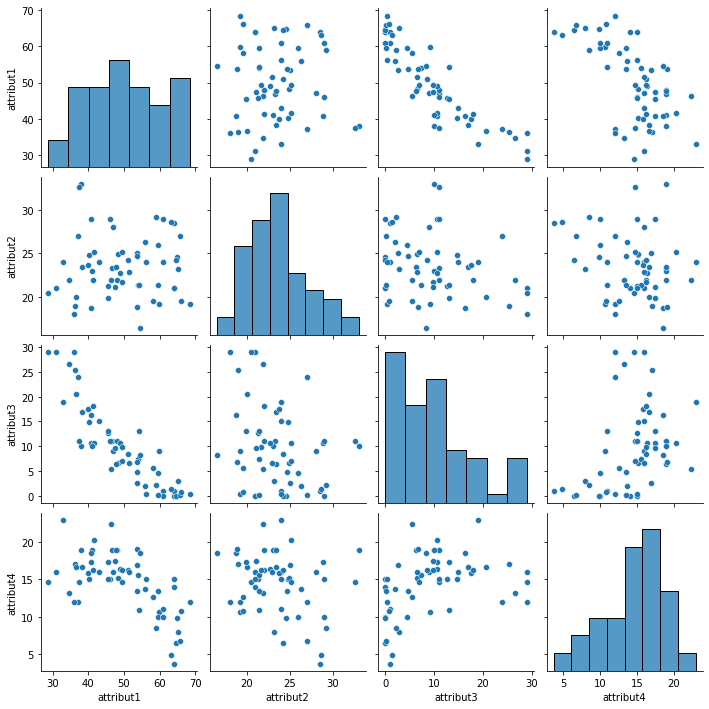

In [3]:
sns.pairplot(df)

<AxesSubplot:>

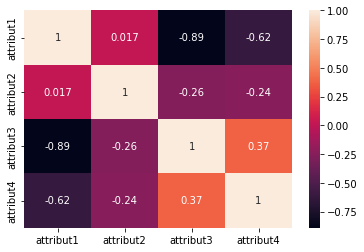

In [4]:
sns.heatmap(df.corr(), annot=True)

Il est nécessaire de faire une analyse en composante principale sur cette base de données.
il existe une corrélation forte entre attribut3 et attribut1(|corr(attribut1,attribut3)|>0.85), les autres variables sont faiblement corrélées.

## __visualisons la séparation entre les classes après transformation__
### __Avec 02 composantes__

In [5]:
from sklearn.decomposition import PCA

In [6]:
X = data[['attribut1', 'attribut2', 'attribut3', 'attribut4']]
y = data['classe']

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0, 0.5, 'Deuxième composante principale')

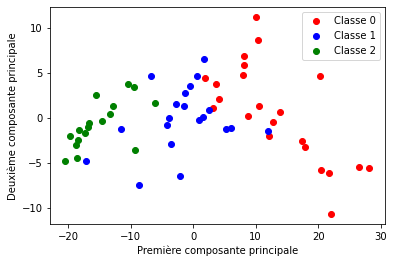

In [8]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='Classe 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='Classe 1')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], color='green', label='Classe 2')
plt.legend()
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')

### __Avec 03 composantes principales__

In [9]:
pca = PCA(n_components=3)
X_pca2 = pca.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Troisième composante principale')

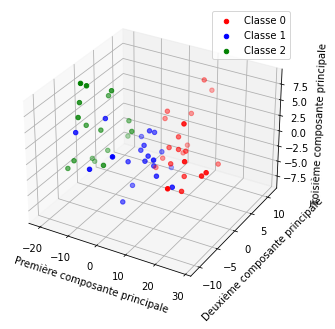

In [10]:
# Visualiser la séparation des classes
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca2[y == 0, 0], X_pca[y == 0, 1], X_pca2[y == 0, 2], color='red', label='Classe 0')
ax.scatter(X_pca2[y == 1, 0], X_pca[y == 1, 1], X_pca2[y == 1, 2], color='blue', label='Classe 1')
ax.scatter(X_pca2[y == 2, 0], X_pca[y == 2, 1], X_pca2[y == 2, 2], color='green', label='Classe 2')
ax.legend()
ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')

## __pour chaque objet, le centroïde dont il est le plus proche par la distance (Euclidienne)__
### __02 composantes principales__

In [11]:
from scipy.spatial import distance

In [12]:
X_pca = X_pca[:, :2]
centroids = []
classes = np.unique(y)
for c in classes:
    X_class = X_pca[y == c]
    centroid = np.mean(X_class, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

In [13]:
distances = distance.cdist(X_pca, centroids, 'euclidean')

In [14]:
predictions = np.argmin(distances, axis=1)

In [15]:
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.8305084745762712


In [16]:
X_pca2 = X_pca2[:, :3]
centroids = []
classes = np.unique(y)
for c in classes:
    X_class = X_pca2[y == c]
    centroid = np.mean(X_class, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

In [17]:
distances = distance.cdist(X_pca2, centroids, 'euclidean')

In [18]:
predictions = np.argmin(distances, axis=1)

In [19]:
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Accuracy: 0.847457627118644


In [20]:
from scipy.spatial.distance import euclidean, cityblock, mahalanobis

In [21]:
# Calculer les centroïdes pour chaque classe
centroids = {}
for cl in np.unique(y):
    centroids[cl] = X[y == cl].mean(axis=0)

# Calculer les distances Euclidienne, Manhattan et Mahalanobis pour chaque objet par rapport aux centroïdes
euclidean_distances = np.array([[euclidean(X.iloc[i, :], centroids[cl]) for cl in np.unique(y)] for i in range(X.shape[0])])
manhattan_distances = np.array([[cityblock(X.iloc[i, :], centroids[cl]) for cl in np.unique(y)] for i in range(X.shape[0])])
cov_mat = np.cov(X, rowvar=False)
mahalanobis_distances = np.array([[mahalanobis(X.iloc[i, :], centroids[cl], cov_mat) for cl in np.unique(y)] for i in range(X.shape[0])])
# Trouver le centroïde le plus proche pour chaque objet en utilisant chaque mesure de distance
euclidean_pred = np.argmin(euclidean_distances, axis=1)
manhattan_pred = np.argmin(manhattan_distances, axis=1)
mahalanobis_pred = np.argmin(mahalanobis_distances, axis=1)

# Comparer les prédictions avec les classes réelles
euclidean_acc = np.mean(euclidean_pred == y)
manhattan_acc = np.mean(manhattan_pred == y)
mahalanobis_acc = np.mean(mahalanobis_pred == y)

# Afficher les résultats
print("Accuracy (Euclidean):", euclidean_acc)
print("Accuracy (Manhattan):", manhattan_acc)
print("Accuracy (Mahalanobis):", mahalanobis_acc)

# Choisir la mesure de distance la plus performante
best_distance = "Euclidean" if euclidean_acc == max(euclidean_acc, manhattan_acc, mahalanobis_acc) else "Manhattan" if manhattan_acc == max(euclidean_acc, manhattan_acc, mahalanobis_acc) else "Mahalanobis"
print("Best distance measure:", best_distance)

Accuracy (Euclidean): 0.847457627118644
Accuracy (Manhattan): 0.847457627118644
Accuracy (Mahalanobis): 0.8305084745762712
Best distance measure: Euclidean


## __Choix du modèle de classification__
### __Utilisons le KNN avec k = 5__

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
#X_pca2, y

In [24]:
X = StandardScaler().fit_transform(X_pca2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [27]:
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


In [28]:
unique_classes = np.unique(y) 
centroids = []
for cls in unique_classes:
    data_cls = X[y == cls] 
    centroid = np.mean(data_cls, axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

# Pour chaque observation, trouver le centroïde le plus proche
pred_classes = np.zeros(X.shape[0]) # tableau pour stocker les classes prédites
for i, obs in enumerate(X):
    distances = np.linalg.norm(centroids - obs, axis=1) # distance euclidienne
    cls = unique_classes[np.argmin(distances)] # classe correspondant au centroïde le plus proche
    pred_classes[i] = cls

In [29]:
acc = np.mean(pred_classes == y)
print(acc)

0.7966101694915254


La meilleur méthode c'est les K-PLus proches voisins avec k = 5 et la métrique des la distance euclidienne car son accuracy est plus grande que celle des plus proches centroides

In [30]:
from sklearn.mixture import GaussianMixture
cols = ['diag','full','spherical', 'tied']

In [31]:
for col in cols:
    gmm = GaussianMixture(n_components=3, covariance_type=col)

    # Entraîner le modèle sur les données
    gmm.fit(X)

    # Prédire la classe pour chaque objet
    y_pred = gmm.predict(X)

    # Calculer la précision de la classification
    accuracy = np.mean(y_pred == y)
    print("Accuracy:{} pour {}".format(accuracy,col))

Accuracy:0.4915254237288136 pour diag
Accuracy:0.5084745762711864 pour full
Accuracy:0.3728813559322034 pour spherical
Accuracy:0.2711864406779661 pour tied


L'accuracy est plus élévé avec l'option full dont la méthode la plus adéquates est celle là.

Determinons la classe de l'objet observation = [52.1, 23.0, 6.1, 16.5] avec le modèle retenu

In [32]:
observation = np.array([[52.1, 23.0, 6.1, 16.5]])
obs = pca.transform(observation)
prediction = knn.predict(obs)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [33]:
print(prediction)

[2]


Observation est de classe 2 selon la prédiction de notre modèle